In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
df1=df[df.variety=='Setosa']
df2=df[df.variety=='Versicolor']
df3=df[df.variety=='Virginica']

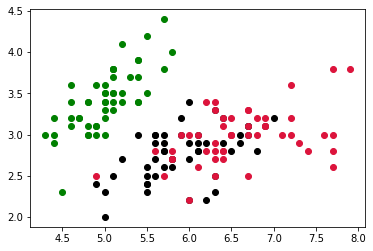

In [3]:
plt.scatter(df1['sepal.length'],df1['sepal.width'],color='green')
plt.scatter(df2['sepal.length'],df2['sepal.width'],color='black')
plt.scatter(df3['sepal.length'],df3['sepal.width'],color='crimson')

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['variety'], axis=1)
y = df.variety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

len(X_train)


120

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [6]:
knn.score(X_test, y_test)

0.9666666666666667

In [7]:
knn.predict([[4.8,3.0,1.5,0.3]])

/home/devfedora/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Setosa'], dtype=object)

In [8]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(42.0, 0.5, 'Truth')

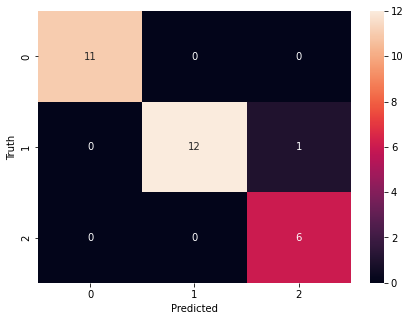

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


## Print classification report for precesion, recall and f1-score for each classes


In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30





## Do not forget to work on exercise, exercise link is below

https://github.com/codebasics/py/blob/master/ML/17_knn_classification/knn_exercise.md
